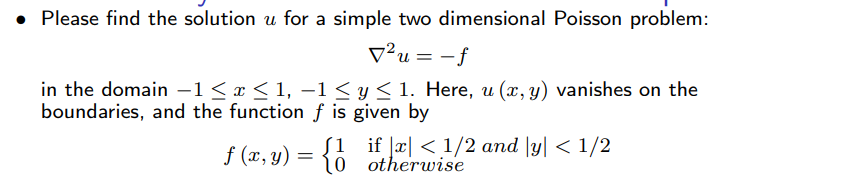

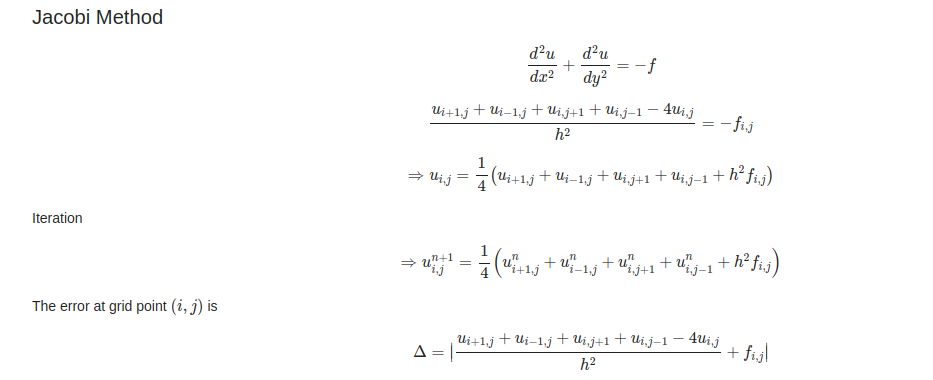


In [7]:
import numpy as np

nx = 10 # intervals
ny = 10

L = 2.0 #meters
h = L/ nx # separation between points

f_arr = np.zeros([nx+1, ny+1])
#print (f_arr)

for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = -1. + i * h
            pos_y = -1 + j * h
            condition = (pos_x > -0.5) and (pos_x<0.5) and (pos_y >-0.5) and (pos_y < 0.5)
            if condition == True:
                f_arr[i,j] = 1.
print (f_arr)            

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
u_old = np.zeros([nx+1, ny+1])
u_new = np.zeros([nx+1, ny+1])

for iter in range(1000):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            delta = (u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1] + u_old[i,j-1]-4.*u_old[i,j])/h**2 + f_arr[i,j]
            u_new[i,j] = 1./4 *(u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1] + u_old[i,j-1] + h**2. * f_arr[i,j])
            res = max(res,abs(delta))
    u_old[:] = u_new[:]

    if iter%100 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))     

iter = 0, res = 1.00e+00
iter = 100, res = 5.54e-03
iter = 200, res = 3.67e-05
iter = 300, res = 2.43e-07
iter = 400, res = 1.61e-09
iter = 500, res = 1.06e-11
iter = 600, res = 6.59e-14
iter = 700, res = 2.11e-15
iter = 800, res = 6.66e-16
iter = 900, res = 6.66e-16


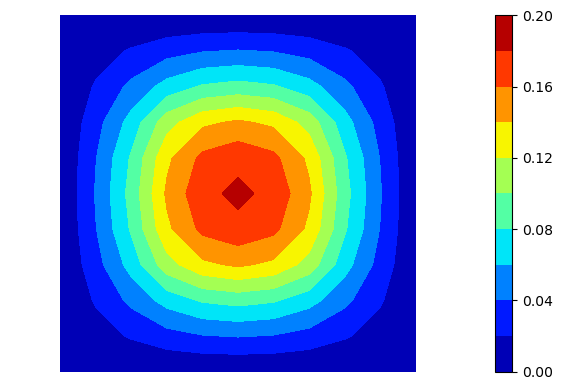

In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm

#===Plotting(2d)===
fig = plt.figure( dpi = 100 ) # dots per inch
fig.set_size_inches(6,4)
Z = np.copy(u_new)
clb = plt.contourf(X,Y, Z, 10, cmap = 'jet')
#plt.colorbar()
plt.colorbar()
plt.clim(0,0.2)
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.axis('off')
plt.tight_layout()



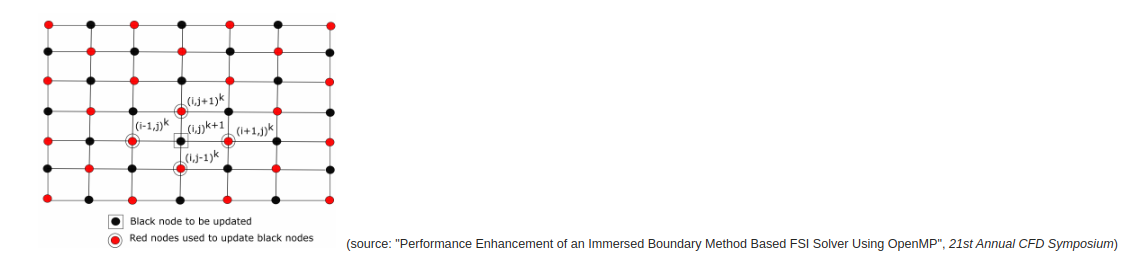

In [34]:

u_arr = np.zeros([nx+1, ny+1])
RED = 0 # even numbers
BLACK = 1 # odd numbers
omega = 1.5
for iter in range(1000):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            if ((i+j)%2 == RED):
                delta = (u_arr[i+1,j] + u_arr[i-1,j] + u_arr[i,j+1] + u_arr[i,j-1]-4.*u_arr[i,j])/h**2 + f_arr[i,j]
                u_GS = 1./4 *(u_arr[i+1,j] + u_arr[i-1,j] + u_arr[i,j+1] + u_arr[i,j-1] + h**2. * f_arr[i,j])
                u_arr[i,j] = (1. - omega) * u_arr[i,j] + omega * u_GS # SOR
                res = max(res,abs(delta))


    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            if ((i+j)%2 == BLACK):
                delta = (u_arr[i+1,j] + u_arr[i-1,j] + u_arr[i,j+1] + u_arr[i,j-1]-4.*u_arr[i,j])/h**2 + f_arr[i,j]
                u_GS = 1./4 *(u_arr[i+1,j] + u_arr[i-1,j] + u_arr[i,j+1] + u_arr[i,j-1] + h**2. * f_arr[i,j])
                u_arr[i,j] = (1. - omega) * u_arr[i,j] + omega * u_GS #SOR
                res = max(res,abs(delta))
                
                
    if iter%100 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))  
        
        
        
        

iter = 0, res = 2.50e+00
iter = 100, res = 3.55e-15
iter = 200, res = 3.55e-15
iter = 300, res = 3.55e-15
iter = 400, res = 3.55e-15
iter = 500, res = 3.55e-15
iter = 600, res = 3.55e-15
iter = 700, res = 3.55e-15
iter = 800, res = 3.55e-15
iter = 900, res = 3.55e-15


###  GS
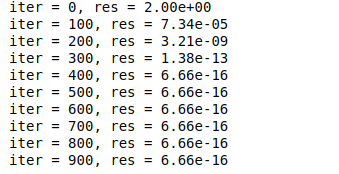




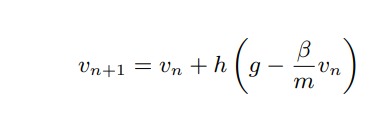



9.799739698290903


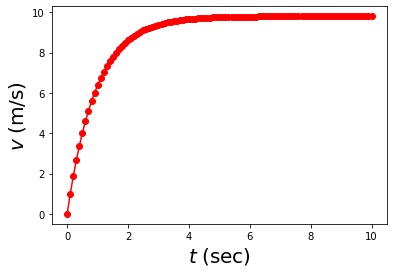

In [44]:
# Euler's method 
    

    
N = 100 # time invervals
total_time = 10. #seconds
h = 10./100.

g = 9.8 # m/s^2
beta = 1. #1/s
m = 1. # kg
v_0 = 0. # m/s

v_arr = np.zeros(101)

for n in range(100):
    #v_n+1  = v_n + h * (g - beta/m * v_n)
    v_arr[n+1] = v_arr[n] + h * (g - beta/m * v_arr[n] )
    
    
#print (v_arr)

t_arr = np.linspace(0,10.,101)

    
    
    

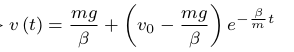

9.799739698290903


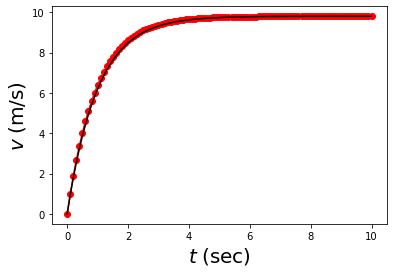

In [46]:
v_analytic = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta/m * t_arr)


plt.plot(t_arr,v_arr,'ro-')

plt.plot(t_arr,v_analytic,'k-')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
    
print (v_arr[-1])
    


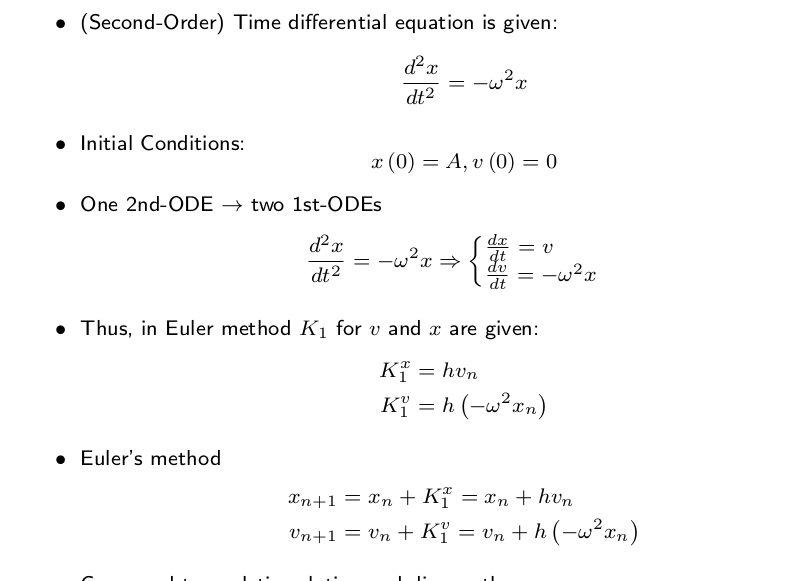

In [51]:



# Euler's method for x and v
N = 100
total_time = 10. 
h = total_time / N
x_arr = np.zeros(N+1)
v_arr = np.zeros(N+1)

omega = 1. # 

x_arr[0] = 1. # initial amplitude
v_arr[0] = 0. # initial velocity
for n in range(100):
    x_arr[n+1] = x_arr[n] + h * v_arr[n]
    v_arr[n+1] = v_arr[n] + h *  (-omega**2. * x_arr[n])
    
#print (x_arr)
#print (v_arr)

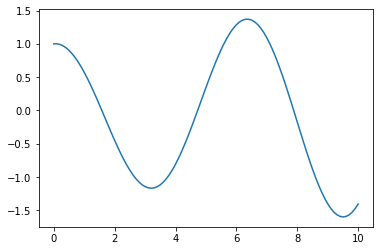

In [52]:
plt.plot(t_arr, x_arr)